In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [13]:
warnings.filterwarnings("ignore")

In [124]:
cities = pd.read_csv("cities.csv")
product = pd.read_csv("product.csv")
sales = pd.read_csv("sales.csv", index_col=0, delimiter = ",")

In [15]:
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [16]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped = sales.set_index('date').groupby('store_id')["sales","revenue"].resample("W").sum()
sales_grouped = sales_grouped.reset_index()
sales_grouped[sales_grouped["store_id"] == "S0002"]

,store_id,date,sales,revenue
0,S0002,2017-01-08,750.232,1813.24
1,S0002,2017-01-15,871.530,1896.91
2,S0002,2017-01-22,1069.555,7404.16
3,S0002,2017-01-29,910.255,2078.39
4,S0002,2017-02-05,732.754,1745.47
...,...,...,...,...
143,S0002,2019-10-06,57.000,363.20
144,S0002,2019-10-13,0.000,0.00
145,S0002,2019-10-20,0.000,0.00
146,S0002,2019-10-27,0.000,0.00


In [17]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped_v2 = sales_grouped.set_index("date")

In [18]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [19]:
store_id = "S0002"

# Filter the data for the specific store ID
df_store = sales_grouped[sales_grouped['store_id'] == store_id]
print(len(df_store))

148


In [20]:
# Get unique store IDs
store_ids = sales['store_id'].unique()
store_ids

array(['S0002', 'S0003', 'S0005', 'S0007', 'S0010', 'S0012', 'S0014',
       'S0015', 'S0016', 'S0020', 'S0022', 'S0023', 'S0026', 'S0030',
       'S0032', 'S0036', 'S0038', 'S0039', 'S0040', 'S0041', 'S0045',
       'S0046', 'S0050', 'S0052', 'S0055', 'S0056', 'S0058', 'S0059',
       'S0061', 'S0062', 'S0067', 'S0068', 'S0071', 'S0072', 'S0073',
       'S0076', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0092', 'S0094', 'S0095', 'S0097', 'S0099',
       'S0102', 'S0104', 'S0107', 'S0108', 'S0109', 'S0120', 'S0122',
       'S0126', 'S0131', 'S0132', 'S0136', 'S0141', 'S0142', 'S0143'],
      dtype=object)

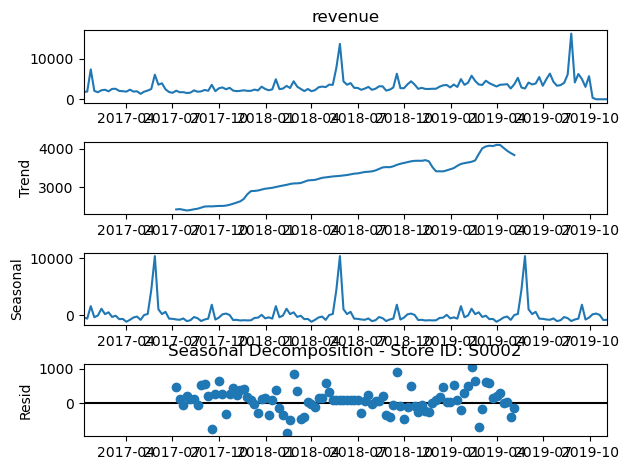

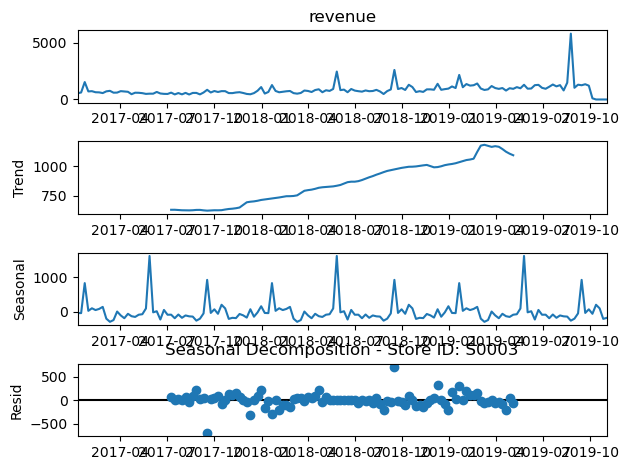

Not enough observations for Store ID: S0005
Not enough observations for Store ID: S0007
Not enough observations for Store ID: S0036
Not enough observations for Store ID: S0046
Not enough observations for Store ID: S0061
Not enough observations for Store ID: S0071
Not enough observations for Store ID: S0076
Not enough observations for Store ID: S0092
Not enough observations for Store ID: S0109


In [21]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# List of store IDs to plot
stores_to_plot = ['S0002', 'S0003']

# Perform seasonal decomposition for each store ID
for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]

    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        continue

    # Perform seasonal decomposition for the specific store ID
    decomposition = seasonal_decompose(df_store['revenue'], model='additive', period=52)

    # Check if the current store ID is in the list of stores to plot
    if store_id in stores_to_plot:
        # Plot the decomposition for the selected store ID
        fig = decomposition.plot()
        plt.title(f"Seasonal Decomposition - Store ID: {store_id}")
        plt.show()

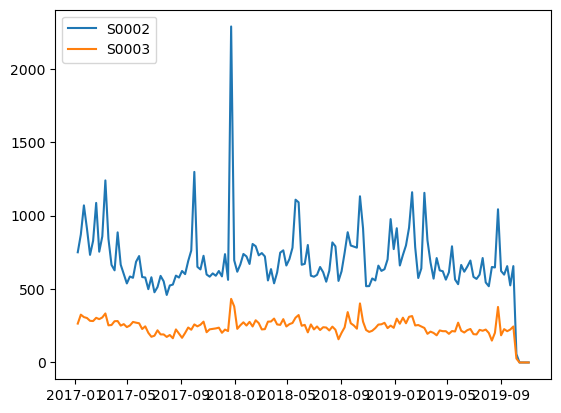

In [22]:
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0002"].loc[:,"sales"], label = "S0002")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0003"].loc[:,"sales"], label = "S0003")
plt.legend(loc="upper left")
plt.show()

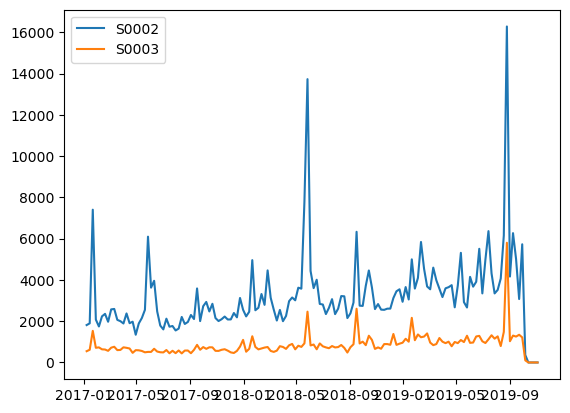

In [23]:
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0002"].loc[:,"revenue"], label = "S0002")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0003"].loc[:,"revenue"], label = "S0003")
plt.legend(loc="upper left")
plt.show()

In [24]:
# Subsetting the dataset: 3 months for test
train = sales_grouped_v2['2017-01-08' :'2019-06-30']
test = sales_grouped_v2['2019-06-30' :'2019-10-06']

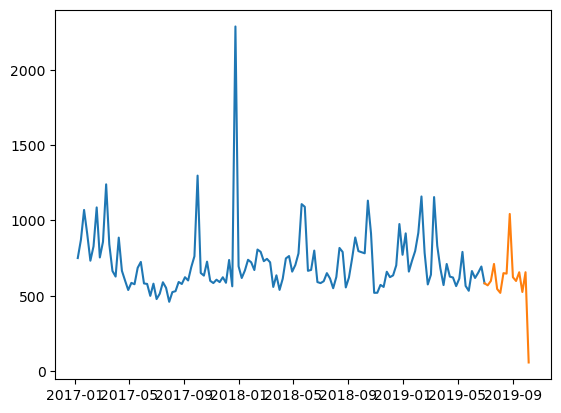

In [25]:
plt.plot(train[train["store_id"] == "S0002"].loc[:,"sales"], label = "Train")
plt.plot(test[test["store_id"] == "S0002"].loc[:,"sales"],label = "Test")
plt.show()

In [26]:
# Simple average
avg = test.copy().reset_index()
mean_sales = train.groupby(["store_id"])["sales"].mean().reset_index()
mean_revenue = train.groupby(["store_id"])["revenue"].mean().reset_index()

In [27]:
for i in range(len(avg)):
    for j in range(len(mean_sales)):
        if avg.loc[i, "store_id"] == mean_sales.loc[j, "store_id"]:
            avg.loc[i, 'avg_forecast_sales'] = mean_sales.loc[j, "sales"]

for i in range(len(avg)):
    for j in range(len(mean_revenue)):
        if avg.loc[i, "store_id"] == mean_revenue.loc[j, "store_id"]:
            avg.loc[i, 'avg_forecast_revenue'] = mean_revenue.loc[j, "revenue"]

avg = avg.set_index("date")

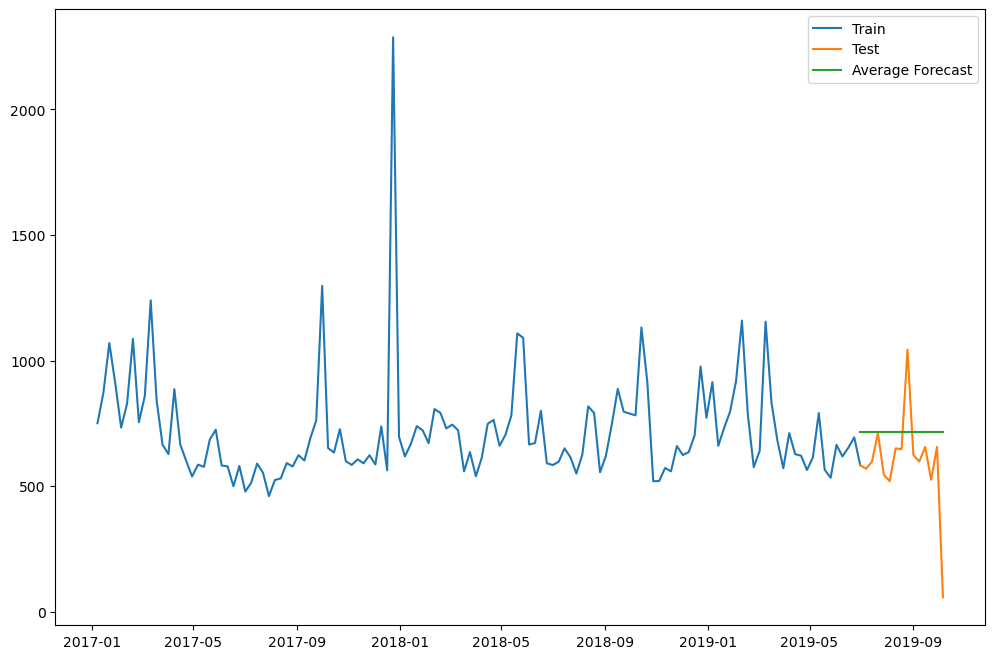

In [28]:
plt.figure(figsize=(12,8))
plt.plot(train[train["store_id"] == "S0002"].loc[:,"sales"], label='Train')
plt.plot(test[test["store_id"] == "S0002"].loc[:,"sales"], label='Test')
plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_sales"], label='Average Forecast')
plt.legend(loc='best')
plt.show()

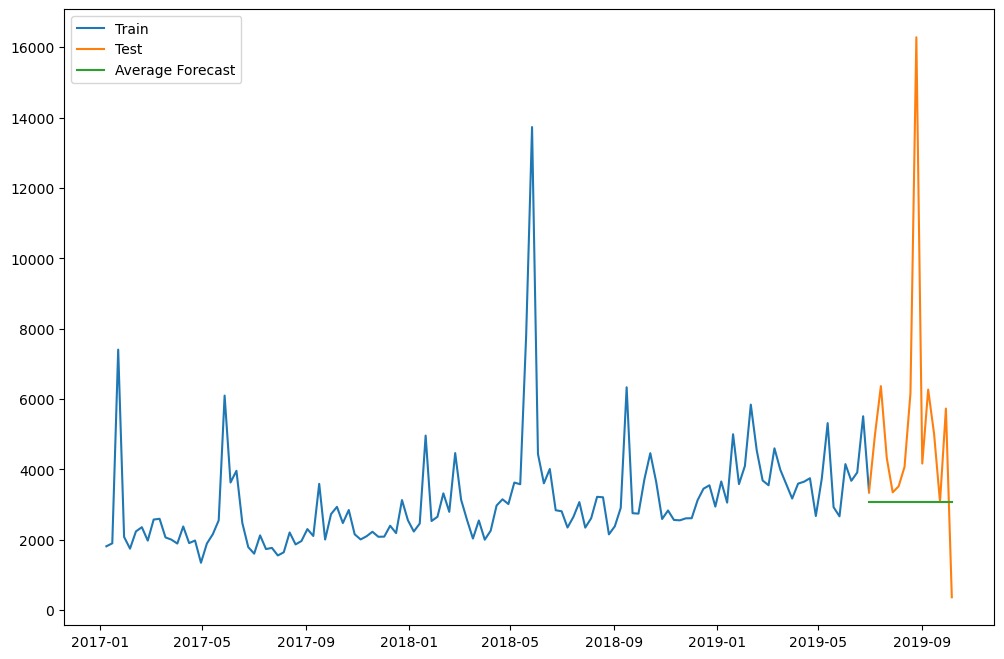

In [29]:
plt.figure(figsize=(12,8))
plt.plot(train[train["store_id"] == "S0002"].loc[:,"revenue"], label='Train')
plt.plot(test[test["store_id"] == "S0002"].loc[:,"revenue"], label='Test')
plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_revenue"], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_sales = sqrt(mean_squared_error(test["sales"], avg.avg_forecast_sales))
rmse_revenue = sqrt(mean_squared_error(test["sales"], avg.avg_forecast_revenue))
print(rmse_sales, rmse_revenue)

256.5496701588549 2848.772125475085


In [31]:
# AUTO-ARIMA - use daily or weekly
%pip install pmdarima
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

Note: you may need to restart the kernel to use updated packages.


In [32]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_grouped["sales"])

(0.01, False)

In [33]:
# Null Hypothesis: The data is not stationary
# Alternative Hypothesis: The data is stationary
# p-value <= significance level (reject the null hypothesis)
# likely data is stationary

In [34]:
# Get unique store IDs
store_ids = train['store_id'].unique()
store_ids

array(['S0002', 'S0003', 'S0005', 'S0007', 'S0010', 'S0012', 'S0014',
       'S0015', 'S0016', 'S0020', 'S0022', 'S0023', 'S0026', 'S0030',
       'S0032', 'S0036', 'S0038', 'S0039', 'S0040', 'S0041', 'S0045',
       'S0046', 'S0050', 'S0052', 'S0055', 'S0056', 'S0058', 'S0059',
       'S0061', 'S0062', 'S0067', 'S0068', 'S0071', 'S0072', 'S0073',
       'S0076', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0092', 'S0094', 'S0095', 'S0097', 'S0099',
       'S0102', 'S0104', 'S0107', 'S0108', 'S0109', 'S0120', 'S0122',
       'S0126', 'S0131', 'S0132', 'S0136', 'S0141', 'S0142', 'S0143'],
      dtype=object)

In [35]:
# Apply auto_arima for each store ID without seasonal component 

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_sales', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)

    # Apply auto_arima for the specific store
    model = auto_arima(df_store["sales"], 
                       start_p=1, 
                       start_q=1,
                       test = "adf", # use adftest to find optimal "d"
                       max_p=5, #maximum p
                       max_q=5, #maximum q
                       m=1, #frequency of series (if m=1, seasonal is set to False automatically)
                       d=None, #let model determine "d"
                       seasonal=False, # no seasonality for standard ARIMA
                       start_P=0, 
                       D=None, #The order of the seasonal differencing 
                       trace=True, #logs
                       error_action='ignore', #doesn't show errors
                       suppress_warnings=True, stepwise=True, random_state=20)

    # Train the model 
    model.fit(df_train_store["sales"])
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store)), columns = ["predicted_sales"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    prediction = prediction.append(prediction_store)

df_test["arima"] = prediction["predicted_sales"]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2008.514, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2056.226, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2033.046, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2009.066, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2054.283, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2010.440, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2010.079, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2008.746, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2022.844, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2007.805, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2008.003, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2031.185, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2009.766, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

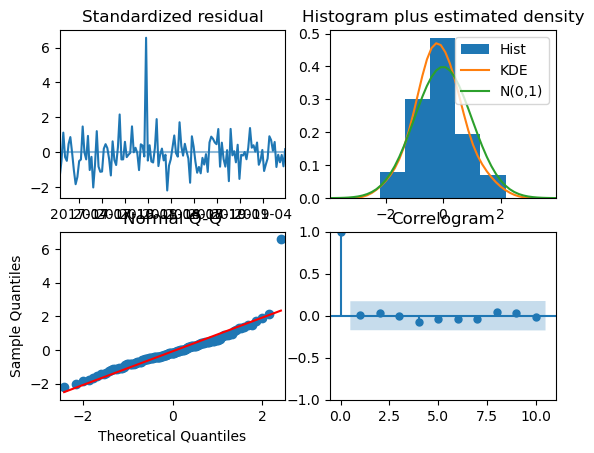

In [36]:
model.plot_diagnostics();

In [37]:
df_test[df_test["store_id"] == "S0002"]

,store_id,sales,revenue,arima
2019-06-30,S0002,583.00,3347.68,686.212452
2019-07-07,S0002,569.00,4983.80,709.546549
2019-07-14,S0002,598.00,6365.78,714.821883
2019-07-21,S0002,711.00,4318.66,716.014521
2019-07-28,S0002,545.00,3346.71,716.284151
2019-08-04,S0002,519.00,3516.66,716.345108
2019-08-11,S0002,650.00,4068.51,716.358889
2019-08-18,S0002,647.00,6158.68,716.362005
2019-08-25,S0002,1043.00,16283.63,716.362709
2019-09-01,S0002,623.00,4164.56,716.362869


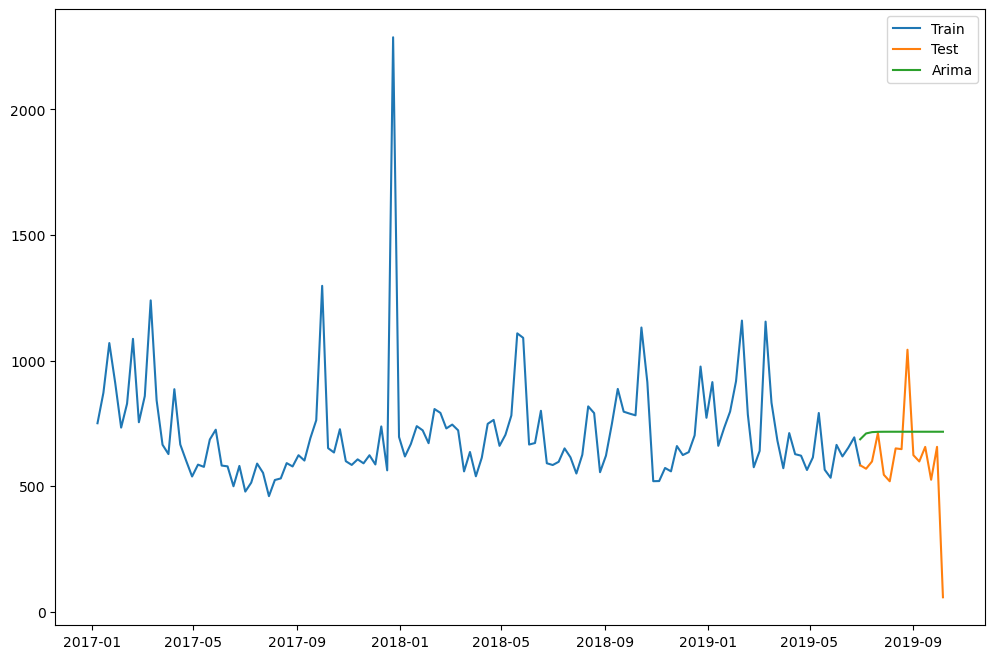

In [38]:
plt.figure(figsize=(12,8))
plt.plot(df_train[df_train["store_id"] == "S0002"].loc[:,"sales"], label='Train')
plt.plot(df_test[df_test["store_id"] == "S0002"].loc[:,"sales"], label='Test')
plt.plot(df_test[df_test["store_id"] == "S0002"].loc[:,"arima"], label='Arima')
#plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_sales"], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [39]:
rmse_sales = sqrt(mean_squared_error(df_test["arima"], df_test["sales"]))
rmse_sales

191.338112410907

In [40]:
# Subsetting the dataset: 1 month for test
train = sales_grouped_v2['2017-01-08' :'2019-09-08']
test = sales_grouped_v2['2019-09-08' :'2019-10-06']
test

,store_id,sales,revenue
date,,,
2019-09-08,S0002,598.00,6267.91
2019-09-15,S0002,656.00,5007.57
2019-09-22,S0002,525.00,3074.56
2019-09-29,S0002,656.16,5728.25
2019-10-06,S0002,57.00,363.20
...,...,...,...
2019-09-08,S0143,104.00,915.27
2019-09-15,S0143,63.00,507.08
2019-09-22,S0143,89.00,601.63


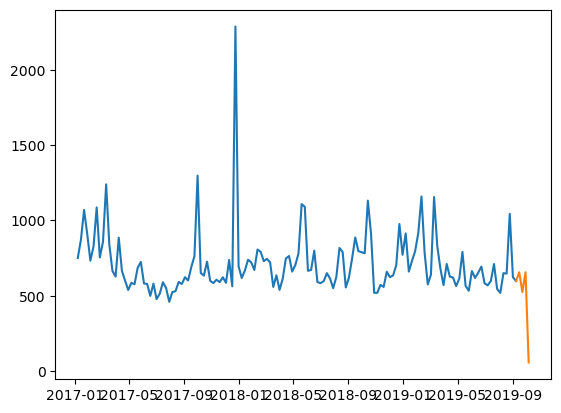

In [41]:
plt.plot(train[train["store_id"] == "S0002"].loc[:,"sales"], label = "Train")
plt.plot(test[test["store_id"] == "S0002"].loc[:,"sales"],label = "Test")
plt.show()

In [ ]:
# Apply auto_arima for each store ID without seasonal component 

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_sales', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)

    # Apply auto_arima for the specific store
    model = auto_arima(df_store["sales"], start_p=1, start_q=1,max_p=5, max_q=5, 
                       m=1, d=1, seasonal=False,start_P=0, D=None, trace=True, error_action='ignore', 
                       suppress_warnings=True, stepwise=True, random_state=20)

    # Train the model 
    model.fit(df_train_store["sales"])
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store)), columns = ["predicted_sales"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    prediction = prediction.append(prediction_store)

df_test["arima"] = prediction["predicted_sales"]

In [96]:
prediction_arima = prediction.copy()
df_test_arima = df_test.copy()
prediction_arima

,predicted_sales,store_id
2019-09-08,686.203360,S0002
2019-09-15,705.986575,S0002
2019-09-22,710.423772,S0002
2019-09-29,711.418995,S0002
2019-10-06,711.642214,S0002
2019-09-08,231.138088,S0003
2019-09-15,226.145696,S0003
2019-09-22,226.145696,S0003
2019-09-29,226.145696,S0003
2019-10-06,226.145696,S0003


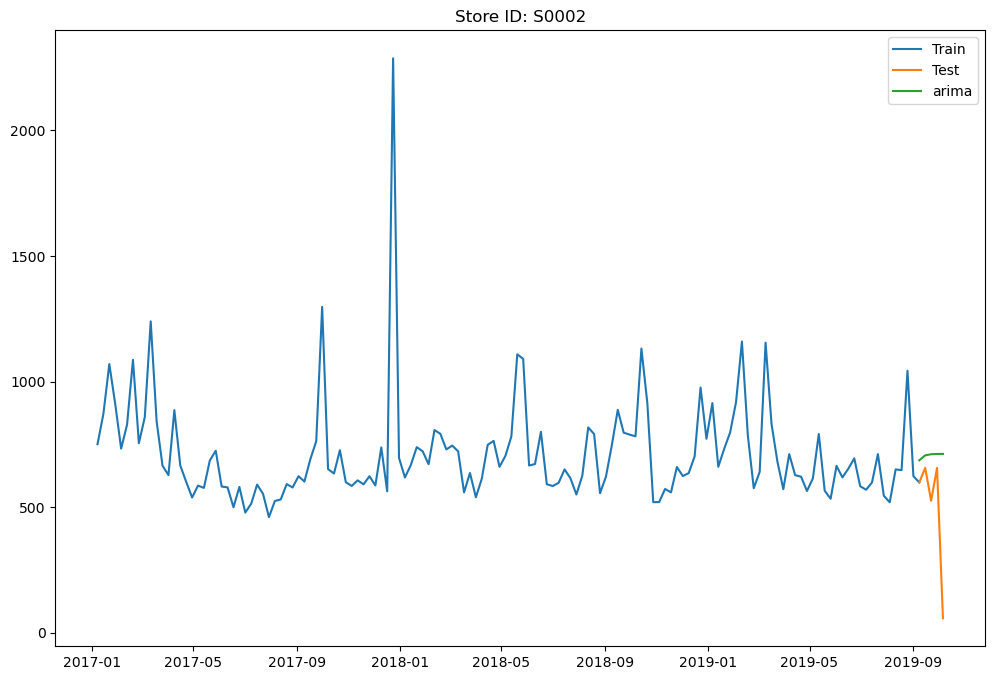

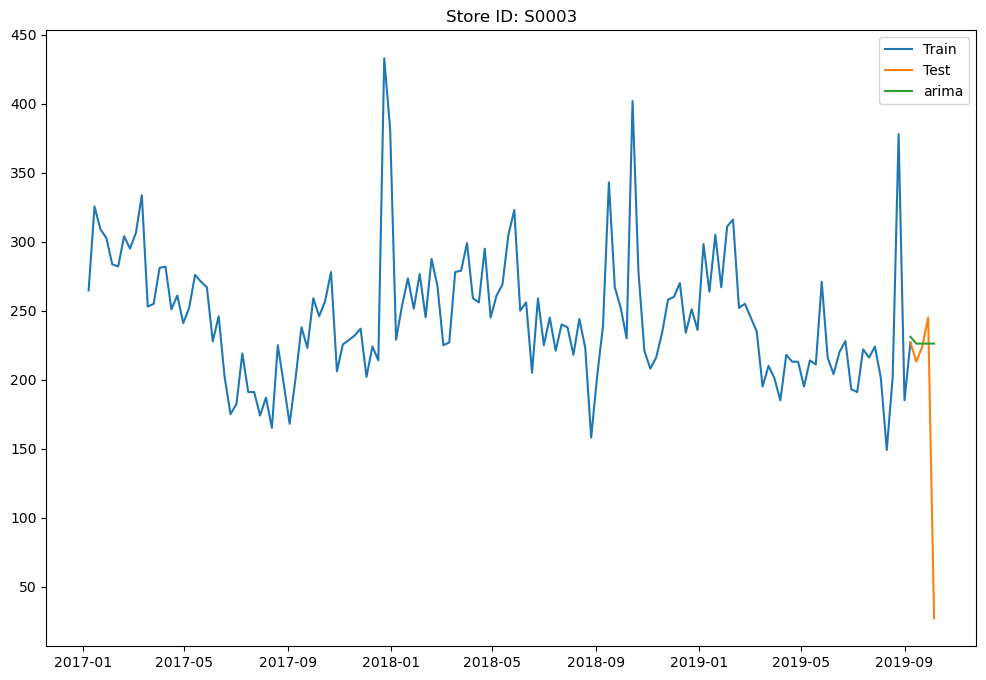

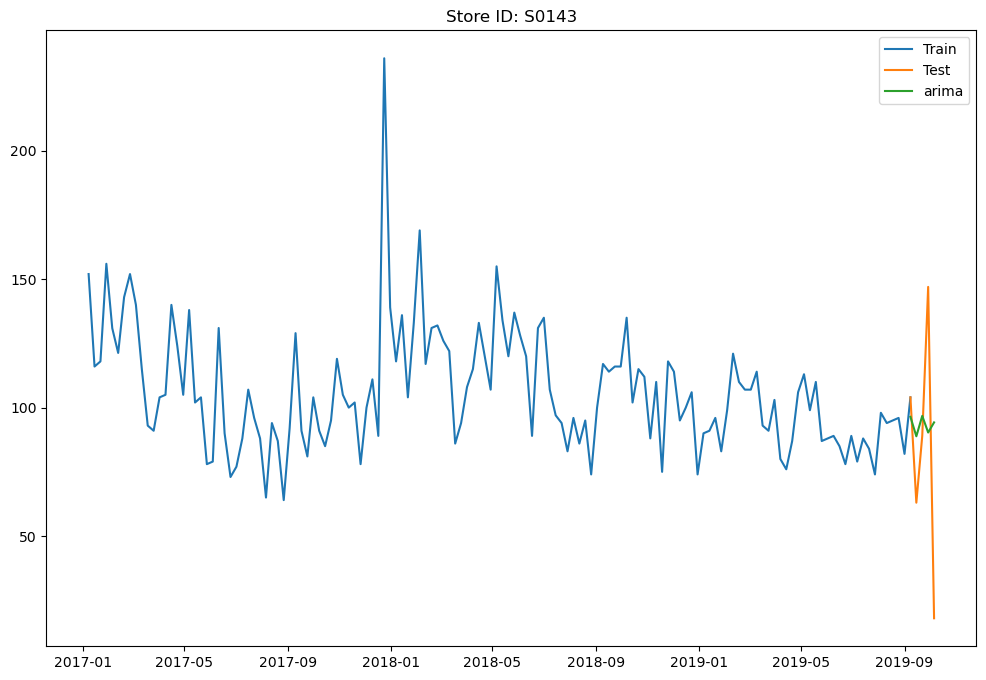

In [97]:
store_ids = ["S0002", "S0003", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(df_train[df_train["store_id"] == store_id].loc[:, "sales"], label='Train')
    plt.plot(df_test_arima[df_test_arima["store_id"] == store_id].loc[:, "sales"], label='Test')
    plt.plot(df_test_arima[df_test_arima["store_id"] == store_id].loc[:, "arima"], label='arima')
    #plt.plot(avg[avg["store_id"] == store_id].loc[:, "avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [45]:
rmse_sales = sqrt(mean_squared_error(df_test["arima"], df_test["sales"]))
rmse_sales

267.41895611407386

In [61]:
# Apply auto_arima for each store ID with seasonal component -- SARIMA 

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_sales', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
insufficient_data_stores = []

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store
    model = auto_arima(df_store["sales"], 
                       start_p=1, 
                       start_q=1, 
                       test = 'kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=53, #12 is the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, error_action='ignore', 
                       suppress_warnings=True, stepwise=True, random_state=20)

    # Train the model 
    model.fit(df_train_store["sales"])
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store)), columns = ["predicted_sales"])
    prediction_store["store_id"] = store_id
    prediction_store = prediction_store.set_index(df_test_store.index)
    
    prediction = prediction.append(prediction_store)

#df_test["arima"] = prediction["predicted_sales"]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[53]             : AIC=inf, Time=5.96 sec
 ARIMA(0,1,0)(0,1,0)[53]             : AIC=1379.209, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[53]             : AIC=inf, Time=2.09 sec
 ARIMA(0,1,1)(0,1,1)[53]             : AIC=inf, Time=5.10 sec
 ARIMA(0,1,0)(1,1,0)[53]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(0,1,1)[53]             : AIC=inf, Time=4.06 sec
 ARIMA(0,1,0)(1,1,1)[53]             : AIC=inf, Time=6.80 sec
 ARIMA(1,1,0)(0,1,0)[53]             : AIC=1357.676, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[53]             : AIC=inf, Time=4.46 sec
 ARIMA(1,1,0)(1,1,1)[53]             : AIC=inf, Time=6.68 sec
 ARIMA(2,1,0)(0,1,0)[53]             : AIC=1350.119, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[53]             : AIC=inf, Time=3.12 sec
 ARIMA(2,1,0)(0,1,1)[53]             : AIC=inf, Time=6.47 sec
 ARIMA(2,1,0)(1,1,1)[53]             : AIC=inf, Time=8.32 sec
 ARIMA(3,1,0)(0,1,0)[53]             : AIC=1344.002, Time=0.64 sec
 ARIMA(

In [84]:
prediction_sarima = prediction.copy()
prediction_sarima

,predicted_sales,store_id
2019-09-08,757.181149,S0002
2019-09-15,992.094454,S0002
2019-09-22,837.691820,S0002
2019-09-29,811.459519,S0002
2019-10-06,824.056495,S0002
...,...,...
2019-09-08,100.884267,S0143
2019-09-15,130.095661,S0143
2019-09-22,108.209655,S0143
2019-09-29,85.590812,S0143


In [72]:
insufficient_data_stores

['S0005',
 'S0007',
 'S0036',
 'S0046',
 'S0061',
 'S0071',
 'S0076',
 'S0092',
 'S0109']

In [85]:
df_test_sarima = df_test[~df_test['store_id'].isin(insufficient_data_stores)]
df_test_sarima

,store_id,sales,revenue
2019-09-08,S0002,598.00,6267.91
2019-09-15,S0002,656.00,5007.57
2019-09-22,S0002,525.00,3074.56
2019-09-29,S0002,656.16,5728.25
2019-10-06,S0002,57.00,363.20
...,...,...,...
2019-09-08,S0143,104.00,915.27
2019-09-15,S0143,63.00,507.08
2019-09-22,S0143,89.00,601.63
2019-09-29,S0143,147.00,704.87


In [86]:
# Assign the predicted sales to df_test
df_test_sarima["Sarima"] = prediction_sarima["predicted_sales"].values

#print("Store IDs with insufficient data:", insufficient_data_stores)

df_test_sarima

,store_id,sales,revenue,Sarima
2019-09-08,S0002,598.00,6267.91,757.181149
2019-09-15,S0002,656.00,5007.57,992.094454
2019-09-22,S0002,525.00,3074.56,837.691820
2019-09-29,S0002,656.16,5728.25,811.459519
2019-10-06,S0002,57.00,363.20,824.056495
...,...,...,...,...
2019-09-08,S0143,104.00,915.27,100.884267
2019-09-15,S0143,63.00,507.08,130.095661
2019-09-22,S0143,89.00,601.63,108.209655
2019-09-29,S0143,147.00,704.87,85.590812


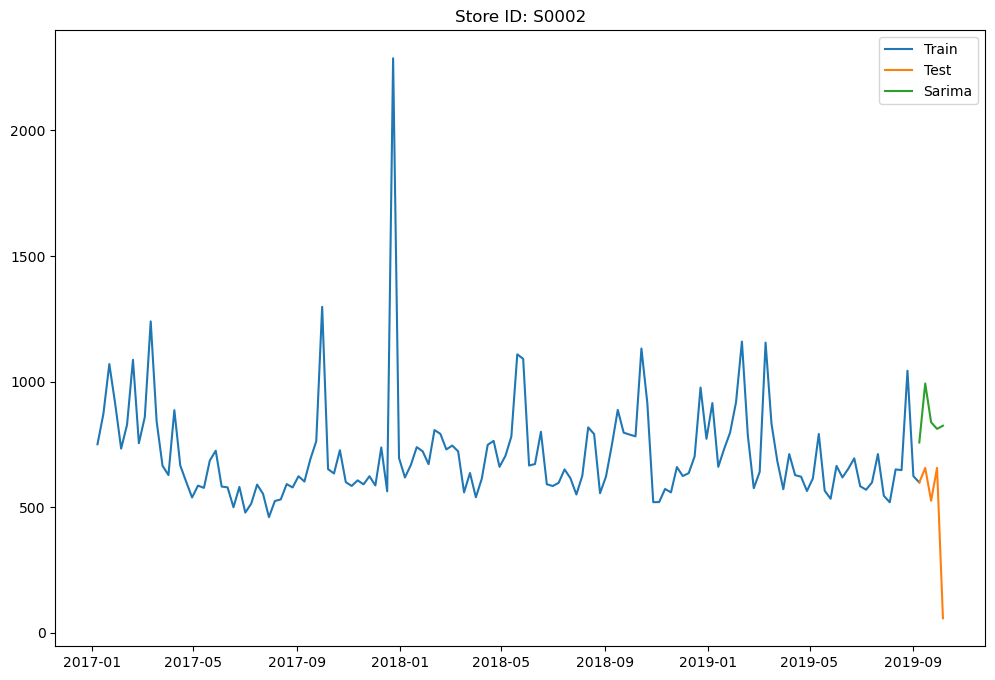

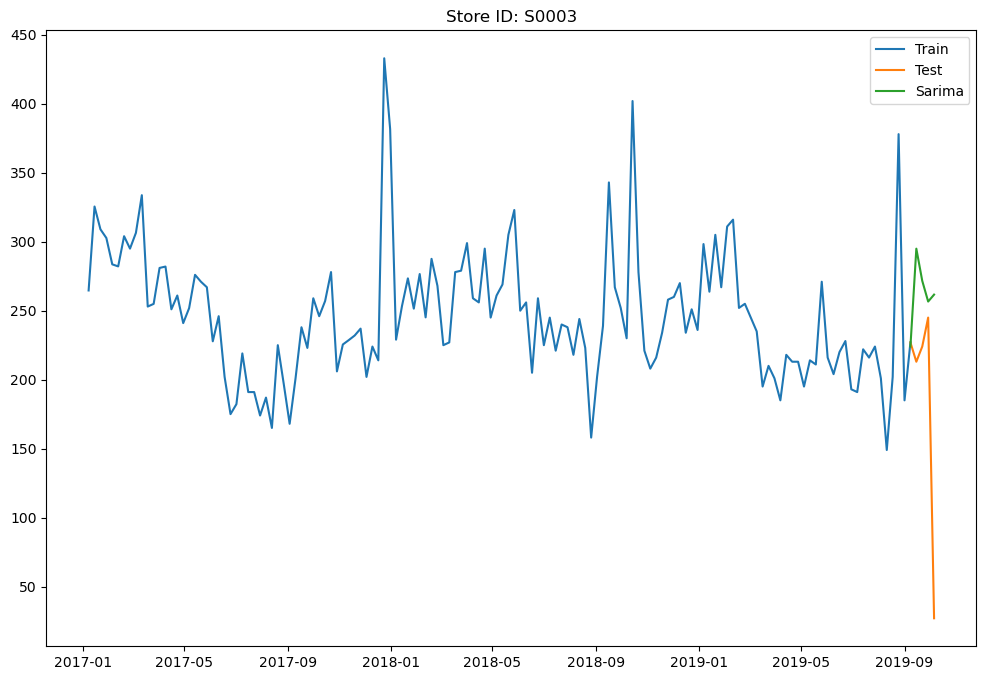

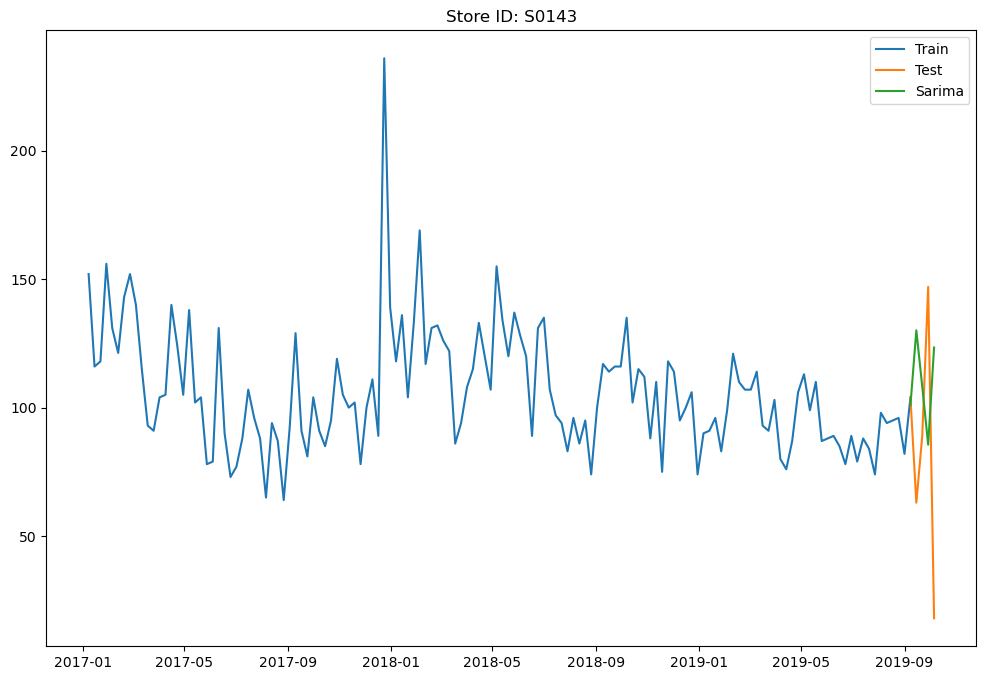

In [87]:
store_ids = ["S0002", "S0003", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(df_train[df_train["store_id"] == store_id].loc[:, "sales"], label='Train')
    plt.plot(df_test_v1[df_test_sarima["store_id"] == store_id].loc[:, "sales"], label='Test')
    plt.plot(df_test_v1[df_test_sarima["store_id"] == store_id].loc[:, "Sarima"], label='Sarima')
    #plt.plot(avg[avg["store_id"] == store_id].loc[:, "avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [81]:
rmse_sales = sqrt(mean_squared_error(df_test_v1["Sarima"], df_test_v1["sales"]))
rmse_sales

357.9414366426367

In [162]:
# Apply auto_arima for each store ID with seasonal component and adding exogenous variables -- SARIMAX 

# Let's take as first promo_discount_2 as exogenous variable 
sales['promo_discount_2'] = sales['promo_discount_2'].fillna(0)
sales['sales'] = sales['sales'].fillna(0)
sales['revenue'] = sales['revenue'].fillna(0)
sales['date'] = pd.to_datetime(sales['date'])

sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,is_holiday
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,0.0,NaN,0
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,0.0,NaN,0
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,0.0,NaN,0
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,0.0,NaN,0
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,0.0,0.00,NaN,19.90,PR03,verylow,PR03,NaN,0.0,NaN,0
8886055,S0143,P0680,2019-10-31,0.0,0.00,NaN,139.90,PR14,NaN,PR03,NaN,0.0,NaN,0
8886056,S0143,P0694,2019-10-31,0.0,0.00,NaN,7.50,PR14,NaN,PR03,NaN,0.0,NaN,0
8886057,S0143,P0718,2019-10-31,0.0,0.00,NaN,23.75,PR14,NaN,PR03,NaN,0.0,NaN,0


In [128]:
%pip install holidays

     -------------------------------------- 642.9/642.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [207]:
# Let's identify whether a certain date is a holiday in Turkey and create a boolean variable with it
import holidays

turkish_holidays = holidays.Turkey()

# Create a new column 'is_holiday' and check if the date is a holiday
sales['is_holiday'] = sales['date'].apply(lambda x: int(x in turkish_holidays))
sales[sales["is_holiday"] == 1]

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,is_holiday
20472,S0002,P0001,2017-04-23,0.0,0.00,1.0,6.50,PR14,NaN,PR03,NaN,0.0,NaN,1
20473,S0002,P0005,2017-04-23,0.0,0.00,10.0,33.90,PR14,NaN,PR03,NaN,0.0,NaN,1
20474,S0002,P0011,2017-04-23,0.0,0.00,4.0,36.00,PR14,NaN,PR03,NaN,0.0,NaN,1
20475,S0002,P0015,2017-04-23,2.0,4.17,5.0,2.85,PR10,low,PR03,NaN,0.0,NaN,1
20476,S0002,P0017,2017-04-23,1.0,1.10,53.0,1.49,PR06,low,PR03,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8885919,S0143,P0676,2019-10-29,0.0,0.00,NaN,19.90,PR03,verylow,PR03,NaN,0.0,NaN,1
8885920,S0143,P0680,2019-10-29,0.0,0.00,NaN,139.90,PR14,NaN,PR03,NaN,0.0,NaN,1
8885921,S0143,P0694,2019-10-29,0.0,0.00,NaN,7.50,PR14,NaN,PR03,NaN,0.0,NaN,1
8885922,S0143,P0718,2019-10-29,0.0,0.00,NaN,23.75,PR14,NaN,PR03,NaN,0.0,NaN,1


In [208]:
sales_promo = sales.set_index('date').groupby('store_id')["sales","revenue", "promo_discount_2", "is_holiday"].resample("W").sum()
sales_promo

sales  revenue  promo_discount_2  is_holiday
store_id date                                                       
S0002    2017-01-08   750.232  1813.24               0.0           0
         2017-01-15   871.530  1896.91               0.0           0
         2017-01-22  1069.555  7404.16               0.0           0
         2017-01-29   910.255  2078.39               0.0           0
         2017-02-05   732.754  1745.47               0.0           0
...                       ...      ...               ...         ...
S0143    2019-10-06    18.000    80.82             792.0           0
         2019-10-13     0.000     0.00             264.0           0
         2019-10-20     0.000     0.00               0.0           0
         2019-10-27     0.000     0.00               0.0           0
         2019-11-03     0.000     0.00               0.0          68

[8610 rows x 4 columns]

In [209]:
# Replace promo_discount_2 values higher than 0 with 1: if there is at least 1 promotion per week and per store, the value is 1 else 0 
sales_promo['promo_discount_2'] = sales_promo['promo_discount_2'].where(sales_promo['promo_discount_2'] <= 0, 1)
sales_promo['is_holiday'] = sales_promo['is_holiday'].where(sales_promo['is_holiday'] <= 0, 1)
sales_promo

sales  revenue  promo_discount_2  is_holiday
store_id date                                                       
S0002    2017-01-08   750.232  1813.24               0.0           0
         2017-01-15   871.530  1896.91               0.0           0
         2017-01-22  1069.555  7404.16               0.0           0
         2017-01-29   910.255  2078.39               0.0           0
         2017-02-05   732.754  1745.47               0.0           0
...                       ...      ...               ...         ...
S0143    2019-10-06    18.000    80.82               1.0           0
         2019-10-13     0.000     0.00               1.0           0
         2019-10-20     0.000     0.00               0.0           0
         2019-10-27     0.000     0.00               0.0           0
         2019-11-03     0.000     0.00               0.0           1

[8610 rows x 4 columns]

In [210]:
sales_promo = sales_promo.reset_index(level="store_id", drop = False)
sales_promo

,store_id,sales,revenue,promo_discount_2,is_holiday
date,,,,,
2017-01-08,S0002,750.232,1813.24,0.0,0
2017-01-15,S0002,871.530,1896.91,0.0,0
2017-01-22,S0002,1069.555,7404.16,0.0,0
2017-01-29,S0002,910.255,2078.39,0.0,0
2017-02-05,S0002,732.754,1745.47,0.0,0
...,...,...,...,...,...
2019-10-06,S0143,18.000,80.82,1.0,0
2019-10-13,S0143,0.000,0.00,1.0,0
2019-10-20,S0143,0.000,0.00,0.0,0


In [211]:
# Subsetting the dataset: 1 month for test
train = sales_promo['2017-01-08' :'2019-09-08']
test = sales_promo['2019-09-08' :'2019-10-06']
test

,store_id,sales,revenue,promo_discount_2,is_holiday
date,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0
2019-09-15,S0002,656.00,5007.57,1.0,0
2019-09-22,S0002,525.00,3074.56,1.0,0
2019-09-29,S0002,656.16,5728.25,1.0,0
2019-10-06,S0002,57.00,363.20,1.0,0
...,...,...,...,...,...
2019-09-08,S0143,104.00,915.27,1.0,0
2019-09-15,S0143,63.00,507.08,1.0,0
2019-09-22,S0143,89.00,601.63,1.0,0


In [192]:
# Apply auto_arima for each store ID with seasonal component and exogenous variables -- SARIMAX

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_sales', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
insufficient_data_stores = []

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    exog_train_store = sales_promo.loc[df_train_store.index, ['promo_discount_2', 'is_holiday']]
    exog_test_store = sales_promo.loc[df_test_store.index, ['promo_discount_2', 'is_holiday']]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store
    model = auto_arima(df_train_store["sales"], 
                       exogenous=exog_train_store,
                       start_p=1, 
                       start_q=1, 
                       test='kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=53,  # 12 is the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["sales"])
    
    # Get the predicted values for the specific store
    prediction_store = pd.DataFrame(
        model.predict(n_periods=len(df_test_store), exogenous=exog_test_store),
        columns=["predicted_sales"]
    )
    prediction_store["store_id"] = store_id
    prediction_store = prediction_store.set_index(df_test_store.index)
    
    prediction = prediction.append(prediction_store)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[53] intercept   : AIC=inf, Time=5.46 sec
 ARIMA(0,0,0)(0,1,0)[53] intercept   : AIC=1224.241, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[53] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(0,0,1)(0,1,1)[53] intercept   : AIC=inf, Time=4.09 sec
 ARIMA(0,0,0)(0,1,0)[53]             : AIC=1222.254, Time=0.10 sec
 ARIMA(0,0,0)(1,1,0)[53] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,0,0)(0,1,1)[53] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,0,0)(1,1,1)[53] intercept   : AIC=inf, Time=6.56 sec
 ARIMA(1,0,0)(0,1,0)[53] intercept   : AIC=1226.002, Time=0.15 sec
 ARIMA(0,0,1)(0,1,0)[53] intercept   : AIC=1226.070, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[53] intercept   : AIC=1227.087, Time=1.10 sec

Best model:  ARIMA(0,0,0)(0,1,0)[53]          
Total fit time: 25.417 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[53] intercept   : AIC=inf, Time=4.96 sec
 ARIMA(0,0,0)(0,1,0)[53] intercept   : AIC=953.882, Time=0.09 sec


In [212]:
# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_sales', 'store_id'])

# Get the unique store IDs from the test DataFrame
store_ids = test["store_id"].unique()

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    exog_train_store = sales_promo.loc[df_train_store.index, ['promo_discount_2', 'is_holiday']]
    exog_test_store = sales_promo.loc[df_test_store.index, ['promo_discount_2', 'is_holiday']]
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_train_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store
    model = auto_arima(df_train_store["sales"], 
                       exogenous=exog_train_store,
                       start_p=1, 
                       start_q=1, 
                       test='kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=53,  # 12 is the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["sales"])
    
    # Get the predicted values for the specific store
    prediction_store = pd.DataFrame(
        model.predict(n_periods=len(df_test_store), exogenous=exog_test_store),
        columns=["predicted_sales"]
    )
    prediction_store["store_id"] = store_id
    prediction_store = prediction_store.set_index(df_test_store.index)
    
    # Append the predictions to the overall prediction DataFrame
    prediction = prediction.append(prediction_store)

print(prediction)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[53] intercept   : AIC=inf, Time=5.07 sec
 ARIMA(0,0,0)(0,1,0)[53] intercept   : AIC=1224.241, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[53] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(0,0,1)(0,1,1)[53] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(0,0,0)(0,1,0)[53]             : AIC=1222.254, Time=0.08 sec
 ARIMA(0,0,0)(1,1,0)[53] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,0,0)(0,1,1)[53] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(0,0,0)(1,1,1)[53] intercept   : AIC=inf, Time=5.56 sec
 ARIMA(1,0,0)(0,1,0)[53] intercept   : AIC=1226.002, Time=0.14 sec
 ARIMA(0,0,1)(0,1,0)[53] intercept   : AIC=1226.070, Time=0.15 sec
 ARIMA(1,0,1)(0,1,0)[53] intercept   : AIC=1227.087, Time=1.04 sec

Best model:  ARIMA(0,0,0)(0,1,0)[53]          
Total fit time: 21.470 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[53] intercept   : AIC=inf, Time=4.26 sec
 ARIMA(0,0,0)(0,1,0)[53] intercept   : AIC=953.882, Time=0.08 sec


In [213]:
prediction_sarimax = prediction.copy()
prediction_sarimax

,predicted_sales,store_id
2019-09-08,747.000000,S0002
2019-09-15,886.976000,S0002
2019-09-22,796.272000,S0002
2019-09-29,788.589000,S0002
2019-10-06,781.687000,S0002
...,...,...
2019-09-08,107.900703,S0143
2019-09-15,138.756971,S0143
2019-09-22,109.073932,S0143
2019-09-29,101.968133,S0143


In [220]:
df_test_sarimax = test[~test['store_id'].isin(insufficient_data_stores)]
df_test_sarimax

,store_id,sales,revenue,promo_discount_2,is_holiday
date,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0
2019-09-15,S0002,656.00,5007.57,1.0,0
2019-09-22,S0002,525.00,3074.56,1.0,0
2019-09-29,S0002,656.16,5728.25,1.0,0
2019-10-06,S0002,57.00,363.20,1.0,0
...,...,...,...,...,...
2019-09-08,S0143,104.00,915.27,1.0,0
2019-09-15,S0143,63.00,507.08,1.0,0
2019-09-22,S0143,89.00,601.63,1.0,0


In [221]:
# Assign the predicted sales to df_test
df_test_sarimax["Sarimax"] = prediction_sarimax["predicted_sales"].values

#print("Store IDs with insufficient data:", insufficient_data_stores)

df_test_sarimax

,store_id,sales,revenue,promo_discount_2,is_holiday,Sarimax
date,,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0,747.000000
2019-09-15,S0002,656.00,5007.57,1.0,0,886.976000
2019-09-22,S0002,525.00,3074.56,1.0,0,796.272000
2019-09-29,S0002,656.16,5728.25,1.0,0,788.589000
2019-10-06,S0002,57.00,363.20,1.0,0,781.687000
...,...,...,...,...,...,...
2019-09-08,S0143,104.00,915.27,1.0,0,107.900703
2019-09-15,S0143,63.00,507.08,1.0,0,138.756971
2019-09-22,S0143,89.00,601.63,1.0,0,109.073932


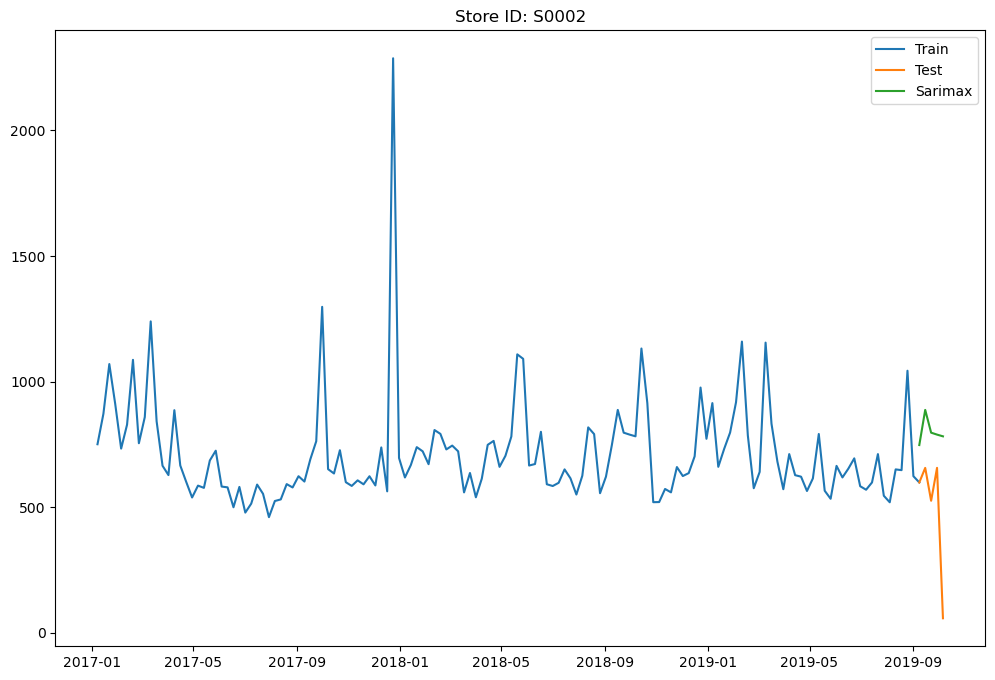

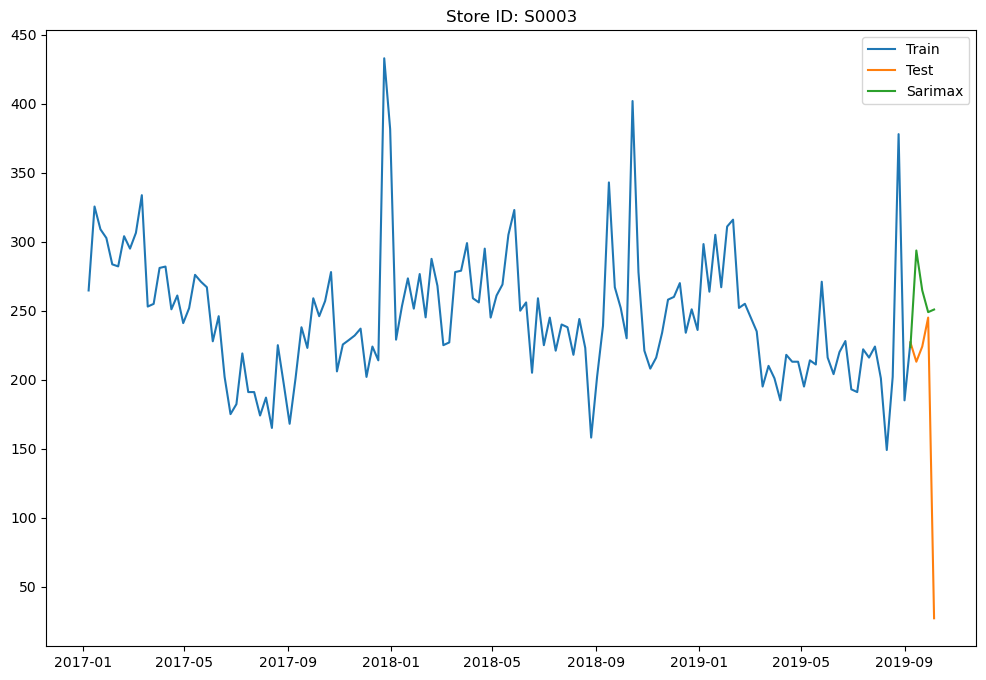

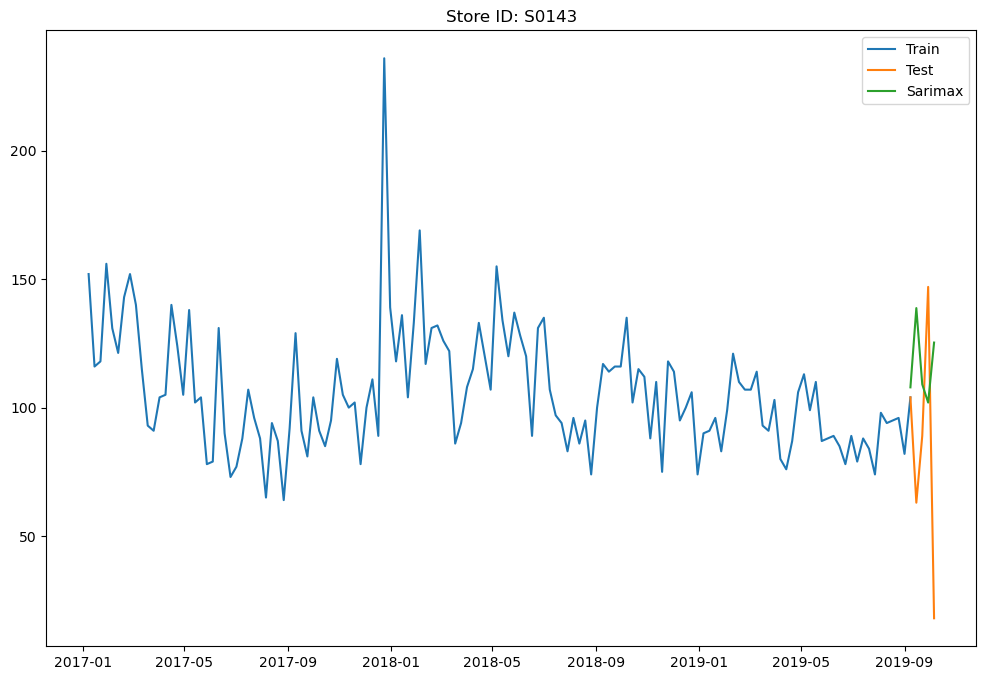

In [224]:
store_ids = ["S0002", "S0003", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(train[train["store_id"] == store_id].loc[:, "sales"], label='Train')
    plt.plot(df_test_sarimax[df_test_sarimax["store_id"] == store_id].loc[:, "sales"], label='Test')
    plt.plot(df_test_sarimax[df_test_sarimax["store_id"] == store_id].loc[:, "Sarimax"], label='Sarimax')
    #plt.plot(avg[avg["store_id"] == store_id].loc[:, "avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [225]:
rmse_sales = sqrt(mean_squared_error(df_test_sarimax["Sarimax"], df_test_sarimax["sales"]))
rmse_sales

345.0025162415872